# PARTIE 2 : Entraînement d'un modèle de base

Nous sommes dans un problème de régression linéaire. 

Nous cherchons à prédire un chiffre : le montant du chiffre d'affaires hebdomadaire des magasins Walmart.

## Import librairies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Import des données

In [2]:
dataset = pd.read_csv('./src/dataset_for_ml.csv')
dataset.drop(['Date'], axis=1, inplace=True)
dataset.head()

,Store,Day,Month,Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18,2,2011,1572117.54,0.0,59.61,3.045,214.777523,6.858
1,13.0,25,3,2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,6.0,28,5,2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
3,4.0,28,5,2010,1857533.70,0.0,60.77,2.756,126.160226,7.896
4,15.0,3,6,2011,695396.19,0.0,69.80,4.069,134.855161,7.658


## Preprocessings avec Sklearn

### Isoler la variable cible

In [3]:
# Seperate target variable y from features X:
target_variable = ['Weekly_Sales']
print('Separating labels from features...')
y = dataset.loc[:,target_variable]
X = dataset.drop(target_variable, axis = 1)
print('...Done')
print()
print('y:')
print(y.head())
print()
print('X:')
print(X.head())
print()

Separating labels from features...
...Done

y:
   Weekly_Sales
0    1572117.54
1    1807545.43
2    1644470.66
3    1857533.70
4     695396.19

X:
   Store  Day  Month  Year  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0    6.0   18      2  2011           0.0        59.61       3.045  214.777523   
1   13.0   25      3  2011           0.0        42.38       3.435  128.616064   
2    6.0   28      5  2010           0.0        78.89       2.759  212.412888   
3    4.0   28      5  2010           0.0        60.77       2.756  126.160226   
4   15.0    3      6  2011           0.0        69.80       4.069  134.855161   

   Unemployment  
0         6.858  
1         7.470  
2         7.092  
3         7.896  
4         7.658  



### Diviser le jeu de données en train set et test set

In [4]:
# Divide dataset into train set and test set:
print('Dividing into train set and test set...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('...Done')
print()

Dividing into train set and test set...
...Done



### Distinguer les variables numériques et catégorielles

In [5]:
# Distinguish numeric and categorical features:
numeric_features = ['Day', 'Month', 'Year', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_features = ['Store', 'Holiday_Flag']

# Create pipeline for numeric features:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

### Application des preprocessings

In [6]:
# Preprocessings on train set:
print('Performing preprocessings on train set...')
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done')
print(X_train[0:5])
print()

# Preprocessings on test set:
print('Performing preprocessings on test set:')
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done')
print(X_test[0:5])
print()

Performing preprocessings on train set...
     Store  Day  Month  Year  Holiday_Flag  Temperature  Fuel_Price  \
109    7.0   25      5  2012           0.0        50.60       3.804   
13     6.0   30      4  2010           0.0        68.91       2.780   
63    15.0   16      3  2012           0.0        47.42       4.021   
71     9.0    9      7  2010           0.0        78.51       2.642   
26     7.0   10      2  2012           1.0        18.79       3.103   

            CPI  Unemployment  
109  197.588605         8.090  
13   211.894272         7.092  
63   137.584387         7.943  
71   214.656430         6.442  
26   196.919506         8.256  
...Done
[[ 1.00479387 -0.4864211   1.29732633 -0.62993689  1.15793519  0.48636272
   0.8273496   0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 1.60182688 -0.80175616 -1.117

## Entraînement du modèle de base

Nous entraînons un modèle de régression linéaire.

In [7]:
# Model training:
baseline = LinearRegression()
print('Training model...')
baseline.fit(X_train, y_train)
print('...Done')

Training model...
...Done


## Effectuer les prédictions

In [8]:
# Predictions on training set:
print('Prediction on training set...')
y_train_pred = baseline.predict(X_train)
print('...Done')
print(y_train_pred[0:5])
print()

Prediction on training set...
...Done
[[ 510980.27804179]
 [1482828.32136527]
 [ 615510.17893994]
 [ 524102.16375997]
 [ 555894.54844284]]



In [9]:
# Predictions on test set:
print('Prediction on test set...')
y_test_pred = baseline.predict(X_test)
print('...Done')
print(y_test_pred[0:5])
print()

Prediction on test set...
...Done
[[ 977876.50406976]
 [ 823871.74820929]
 [ 438716.63046223]
 [ 818948.20549277]
 [2014541.58031281]]



## Évaluation des performances du modèle

Nous utilisons la métrique R2 pour évaluer la performance de notre modèle.

In [10]:
# Print scores:
print('R2 score on train set:', baseline.score(X_train, y_train))
print('R2 score on test set:', baseline.score(X_test, y_test))

R2 score on train set: 0.9707223338797841
R2 score on test set: 0.9487011593511447


Le R2 score est très bon : 0,97 et 0,94.

Toutefois le score sur le train set est meilleur que le score du test set. 

--> Nous avons de l'overfitting, le modèle sur-apprend et a des difficultés à généraliser.

## Importance des features

In [49]:
# Get the names and coefficients of the features:
feature_names_out = preprocessor.get_feature_names_out()
feature_names = [fname for fname in feature_names_out]
coefs = pd.DataFrame(index = feature_names, data = baseline.coef_.transpose(), columns=["coefficients"])

In [50]:
feature_importance = coefs.sort_values(by='coefficients', ascending=False)
feature_importance

,coefficients
cat__Store_4.0,7.750300e+05
cat__Store_14.0,6.687053e+05
cat__Store_13.0,6.110865e+05
cat__Store_10.0,5.568495e+05
cat__Store_2.0,4.483701e+05
cat__Store_20.0,3.599918e+05
cat__Store_11.0,1.981730e+05
num__CPI,1.130066e+05
cat__Store_19.0,1.008158e+05
num__Month,7.370106e+04


In [54]:
negative_coefs = feature_importance[feature_importance['coefficients']<0]

Nous nous intéressons aux coefficients en valeur absolue afin de mettre en évidence les plus 'lourds' quelque soit leur signe.

In [64]:
# Compute abs() and sort values:
feature_importance_abs = abs(coefs).sort_values(by='coefficients', ascending=False)

In [65]:
feature_importance_abs = feature_importance_abs.transpose()
feature_importance_abs

,cat__Store_5.0,cat__Store_3.0,cat__Store_9.0,cat__Store_16.0,cat__Store_7.0,cat__Store_4.0,cat__Store_8.0,cat__Store_14.0,cat__Store_15.0,cat__Store_13.0,...,num__CPI,cat__Store_19.0,cat__Holiday_Flag_1.0,num__Month,num__Temperature,num__Day,num__Unemployment,num__Fuel_Price,cat__Store_6.0,num__Year
coefficients,1.266474e+06,1.197537e+06,1.142032e+06,1.040568e+06,920076.71278,775030.011618,756590.811056,668705.332363,649481.214251,611086.545096,...,113006.618947,100815.798525,91761.488909,73701.058247,49359.819901,48442.274873,26071.065454,20942.815858,13029.1093,10290.918238


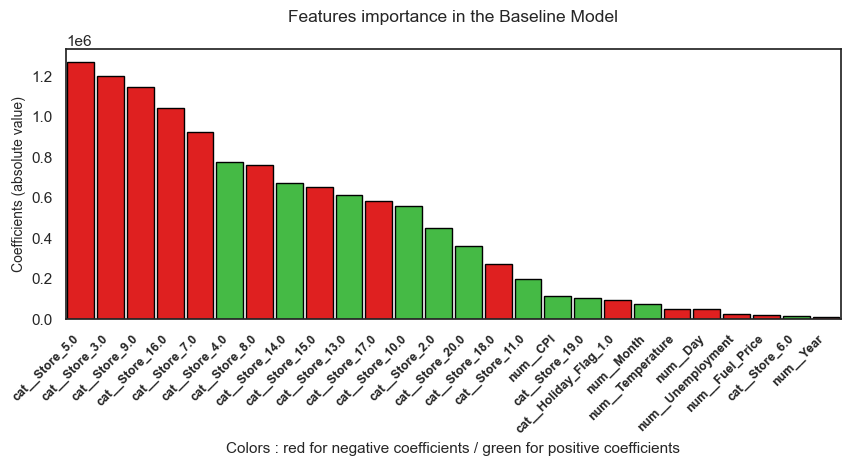

In [79]:
# Plot coefficients (in absolute value):
import seaborn as sns
import matplotlib.pyplot as plt 

colors = ['red' if y in negative_coefs.index else 'limegreen' for y in feature_importance_abs.columns]
sns.set(rc={'figure.figsize':(10, 3.5)}, style='white')
sns.barplot(data = feature_importance_abs,orient = 'v', palette = colors, width = .9, edgecolor = 'black')
plt.title('Features importance in the Baseline Model', fontsize=12.5, pad=20)
plt.xlabel('Colors : red for negative coefficients / green for positive coefficients', fontsize=11)
plt.ylabel('Coefficients (absolute value)', fontsize=10)
plt.xticks(fontsize=9, fontweight='bold', rotation=45, ha='right')
plt.xticks(feature_importance_abs.columns, fontsize=9, fontweight='bold', rotation=45, ha="right")
plt.legend('', frameon=False)
plt.show()

### Résultats :

- Certaines variables ont plus de poids dans notre modèle de prédiction. 

- Il s'agit des magasins n° : 
    - 5, 3, 9, 16, 7, 8 soit les magasins les moins performants
    - 4, 14, 13 soit les magasins avec les meilleures performances

- Les indicateurs économiques (index d'inflation, prix de l'essence, taux de chômage) et de saison (jours fériés, mois, température) ont une moindre importance dans notre modèle de prédiction.